In [95]:
# pip install ucimlrepo
# pip install xgboost
import numpy as np
import pandas as pd

__Importing the Car Evaluation Dataset__

In [3]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
car_evaluation = fetch_ucirepo(id=19) 
  
# data (as pandas dataframes) 
X = car_evaluation.data.features 
y = car_evaluation.data.targets 
  
# metadata 
print(car_evaluation.metadata) 
  
# variable information 
print(car_evaluation.variables)

{'uci_id': 19, 'name': 'Car Evaluation', 'repository_url': 'https://archive.ics.uci.edu/dataset/19/car+evaluation', 'data_url': 'https://archive.ics.uci.edu/static/public/19/data.csv', 'abstract': 'Derived from simple hierarchical decision model, this database may be useful for testing constructive induction and structure discovery methods.', 'area': 'Other', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 1728, 'num_features': 6, 'feature_types': ['Categorical'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1988, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5JP48', 'creators': ['Marko Bohanec'], 'intro_paper': {'ID': 249, 'type': 'NATIVE', 'title': 'Knowledge acquisition and explanation for multi-attribute decision making', 'authors': 'M. Bohanec, V. Rajkovič', 'venue': '8th Intl Workshop on Expert Systems and their Applications, 

In [97]:
print(type(X))
print(type(y))

print(X.shape)
print(y.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
(1728, 6)
(1728, 1)


In [99]:
X.describe()

,buying,maint,doors,persons,lug_boot,safety
count,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3
top,vhigh,vhigh,2,2,small,low
freq,432,432,432,576,576,576


In [101]:
y.describe()

,class
count,1728
unique,4
top,unacc
freq,1210


__One Hot Encoding__

In [104]:
X_encoded = pd.get_dummies(X) # One hot encoding
y_encoded = pd.get_dummies(y) # One hot encoding

# print(X_encoded)
# print(y_encoded)

print(type(X))
print(type(y))

print(X_encoded.shape)
print(y_encoded.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
(1728, 21)
(1728, 4)


__Dataset Partitioning__

In [107]:
from sklearn.model_selection import train_test_split

# data split, 70% training and 30% temp (temp = validation + test)
X_train, X_temp, y_train, y_temp = train_test_split(X_encoded, y_encoded, test_size=0.3, random_state=42)

# 30% temp data into 15% validation and 15% test
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [109]:
X_train

,buying_high,buying_low,buying_med,buying_vhigh,maint_high,maint_low,maint_med,maint_vhigh,doors_2,doors_3,...,doors_5more,persons_2,persons_4,persons_more,lug_boot_big,lug_boot_med,lug_boot_small,safety_high,safety_low,safety_med
1178,False,False,True,False,False,False,True,False,False,False,...,True,False,True,False,True,False,False,True,False,False
585,True,False,False,False,True,False,False,False,False,True,...,False,False,False,True,False,False,True,False,True,False
1552,False,True,False,False,False,False,True,False,False,True,...,False,False,True,False,False,True,False,False,False,True
1169,False,False,True,False,False,False,True,False,False,False,...,True,True,False,False,True,False,False,True,False,False
1033,False,False,True,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,False,False,True,False,False,False,True,False,False,True,...,False,False,False,True,False,True,False,True,False,False
1294,False,False,True,False,False,True,False,False,False,False,...,True,False,False,True,True,False,False,False,False,True
860,True,False,False,False,False,True,False,False,False,False,...,True,False,False,True,False,True,False,True,False,False
1459,False,True,False,False,True,False,False,False,False,False,...,False,True,False,False,False,False,True,False,False,True


In [111]:
y_train

,class_acc,class_good,class_unacc,class_vgood
1178,False,False,False,True
585,False,False,True,False
1552,True,False,False,False
1169,False,False,True,False
1033,False,False,True,False
...,...,...,...,...
1130,False,False,False,True
1294,False,True,False,False
860,True,False,False,False
1459,False,False,True,False


In [113]:
X_val

,buying_high,buying_low,buying_med,buying_vhigh,maint_high,maint_low,maint_med,maint_vhigh,doors_2,doors_3,...,doors_5more,persons_2,persons_4,persons_more,lug_boot_big,lug_boot_med,lug_boot_small,safety_high,safety_low,safety_med
192,False,False,False,True,True,False,False,False,False,False,...,True,True,False,False,False,True,False,False,True,False
834,True,False,False,False,False,True,False,False,False,False,...,False,False,False,True,True,False,False,False,True,False
677,True,False,False,False,False,False,True,False,False,True,...,False,True,False,False,False,False,True,True,False,False
1516,False,True,False,False,False,False,True,False,True,False,...,False,True,False,False,False,True,False,False,False,True
1157,False,False,True,False,False,False,True,False,False,False,...,False,False,False,True,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
582,True,False,False,False,True,False,False,False,False,True,...,False,False,True,False,True,False,False,False,True,False
1450,False,True,False,False,True,False,False,False,False,True,...,False,False,False,True,False,False,True,False,False,True
244,False,False,False,True,False,False,True,False,False,True,...,False,True,False,False,False,False,True,False,False,True
907,False,False,True,False,False,False,False,True,False,True,...,False,False,True,False,True,False,False,False,False,True


In [115]:
y_val

,class_acc,class_good,class_unacc,class_vgood
192,False,False,True,False
834,False,False,True,False
677,False,False,True,False
1516,False,False,True,False
1157,False,False,False,True
...,...,...,...,...
582,False,False,True,False
1450,True,False,False,False
244,False,False,True,False
907,True,False,False,False


In [117]:
X_test

,buying_high,buying_low,buying_med,buying_vhigh,maint_high,maint_low,maint_med,maint_vhigh,doors_2,doors_3,...,doors_5more,persons_2,persons_4,persons_more,lug_boot_big,lug_boot_med,lug_boot_small,safety_high,safety_low,safety_med
974,False,False,True,False,True,False,False,False,True,False,...,False,True,False,False,False,False,True,True,False,False
78,False,False,False,True,False,False,False,True,False,False,...,False,False,False,True,True,False,False,False,True,False
23,False,False,False,True,False,False,False,True,True,False,...,False,False,False,True,False,True,False,True,False,False
813,True,False,False,False,False,True,False,False,False,False,...,False,True,False,False,False,True,False,False,True,False
1356,False,True,False,False,False,False,False,True,False,False,...,False,True,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998,False,False,True,False,True,False,False,False,True,False,...,False,False,False,True,True,False,False,True,False,False
1221,False,False,True,False,False,True,False,False,False,True,...,False,True,False,False,True,False,False,False,True,False
367,False,False,False,True,False,True,False,False,False,True,...,False,False,True,False,True,False,False,False,False,True
1428,False,True,False,False,True,False,False,False,True,False,...,False,False,False,True,True,False,False,False,True,False


In [119]:
y_test

,class_acc,class_good,class_unacc,class_vgood
974,False,False,True,False
78,False,False,True,False
23,False,False,True,False
813,False,False,True,False
1356,False,False,True,False
...,...,...,...,...
998,True,False,False,False
1221,False,False,True,False
367,True,False,False,False
1428,False,False,True,False


__Building a Single Decision Tree__

In [121]:
from sklearn.tree import DecisionTreeClassifier
single_decision_tree_classifier = DecisionTreeClassifier()

In [123]:
single_decision_tree_classifier.fit(X_train, y_train)

DecisionTreeClassifier()

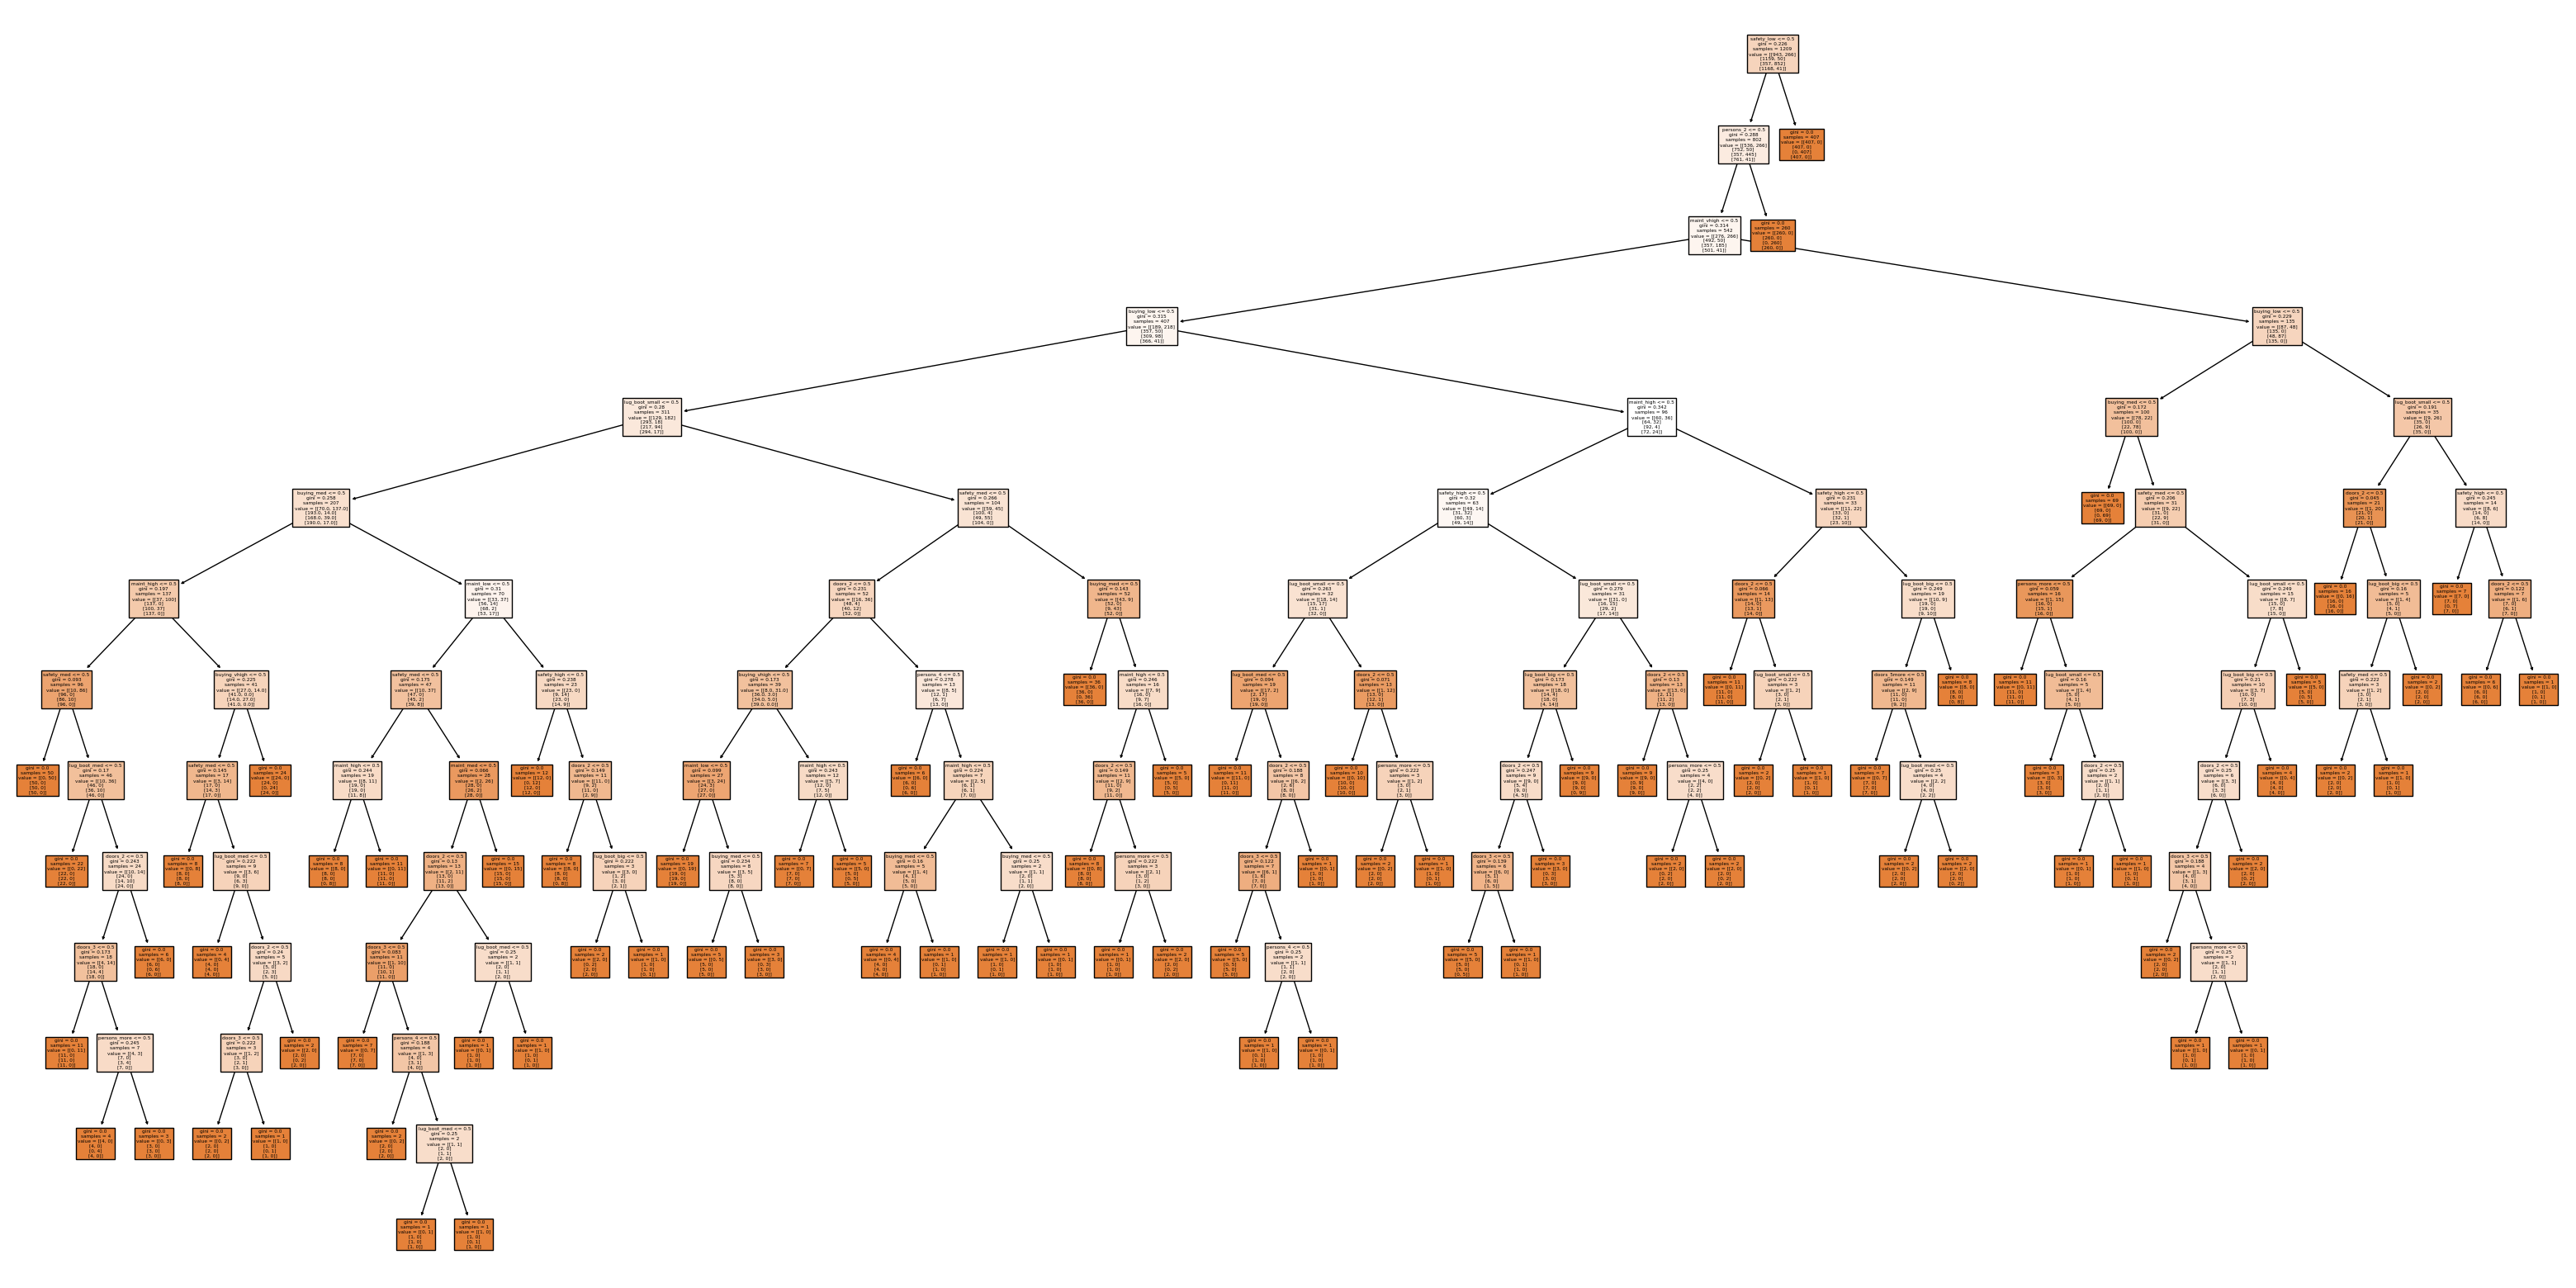

In [125]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(40, 20))
plot_tree(single_decision_tree_classifier, filled=True, feature_names=X_train.columns, class_names=single_decision_tree_classifier.classes_)
plt.show()

__Accuracy of the Single Decision Tree on the Validation Set__

In [127]:
from sklearn.metrics import accuracy_score

y_val_pred = single_decision_tree_classifier.predict(X_val)

val_accuracy = accuracy_score(y_val, y_val_pred)
print(val_accuracy)

0.9613899613899614


__Accuracy of the Single Decision Tree on the Test Set__

In [129]:
from sklearn.metrics import accuracy_score

y_test_pred = single_decision_tree_classifier.predict(X_test)

test_accuracy = accuracy_score(y_test, y_test_pred)
print(test_accuracy)

0.9653846153846154


In [137]:
from sklearn.ensemble import RandomForestClassifier

In [139]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [141]:
from sklearn.metrics import accuracy_score, classification_report

# Make predictions on the validation set
y_val_pred = rf.predict(X_val)

# Calculate accuracy
accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {accuracy:.2f}")

# Print classification report for more detailed metrics
print("Classification Report:")
print(classification_report(y_val, y_val_pred, zero_division=0))

Validation Accuracy: 0.91
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.86      0.88        57
           1       1.00      0.40      0.57        10
           2       1.00      0.98      0.99       178
           3       0.82      0.64      0.72        14

   micro avg       0.97      0.91      0.94       259
   macro avg       0.93      0.72      0.79       259
weighted avg       0.97      0.91      0.93       259
 samples avg       0.91      0.91      0.91       259



In [143]:
from sklearn.metrics import accuracy_score, classification_report

# Make predictions on the test set
y_test_pred = rf.predict(X_test)

# Calculate accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Print classification report for more detailed metrics
print("Classification Report on Test Data:")
print(classification_report(y_test, y_test_pred, zero_division=0))

Test Accuracy: 0.93
Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.91      0.85      0.88        61
           1       0.67      0.67      0.67         9
           2       1.00      0.98      0.99       180
           3       1.00      0.60      0.75        10

   micro avg       0.97      0.93      0.95       260
   macro avg       0.89      0.78      0.82       260
weighted avg       0.97      0.93      0.95       260
 samples avg       0.93      0.93      0.93       260



In [184]:
from xgboost import XGBClassifier

In [186]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Fit the model
model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_val)

# Convert y_val and y_pred to NumPy arrays for compatibility
y_val_array = y_val.values  # Convert to NumPy array
y_pred_array = y_pred  # y_pred is already a NumPy array from the predict method

# Calculate and print performance metrics
accuracy = accuracy_score(y_val_array.argmax(axis=1), y_pred_array.argmax(axis=1))
print(f"Accuracy: {accuracy:.4f}")

conf_matrix = confusion_matrix(y_val_array.argmax(axis=1), y_pred_array.argmax(axis=1))  # Adjust for one-hot encoding
print("Confusion Matrix:")
print(conf_matrix)

class_report = classification_report(y_val_array.argmax(axis=1), y_pred_array.argmax(axis=1))  # Adjust for one-hot encoding
print("Classification Report:")
print(class_report)


Accuracy: 0.9653
Confusion Matrix:
[[ 54   2   0   1]
 [  2   7   0   1]
 [  0   0 178   0]
 [  2   1   0  11]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94        57
           1       0.70      0.70      0.70        10
           2       1.00      1.00      1.00       178
           3       0.85      0.79      0.81        14

    accuracy                           0.97       259
   macro avg       0.87      0.86      0.86       259
weighted avg       0.96      0.97      0.97       259



In [188]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Fit the model
model = XGBClassifier()
model.fit(X_train, y_train)

# Predictions on the validation set
y_val_pred = model.predict(X_val)

# Convert y_val and y_val_pred to NumPy arrays for compatibility
y_val_array = y_val.values  # Convert validation labels to NumPy array
y_val_pred_array = y_val_pred  # y_val_pred is already a NumPy array from the predict method

# Calculate and print performance metrics for validation set
accuracy_val = accuracy_score(y_val_array.argmax(axis=1), y_val_pred_array.argmax(axis=1))
print(f"Validation Accuracy: {accuracy_val:.4f}")

conf_matrix_val = confusion_matrix(y_val_array.argmax(axis=1), y_val_pred_array.argmax(axis=1))  # Adjust for one-hot encoding
print("Validation Confusion Matrix:")
print(conf_matrix_val)

class_report_val = classification_report(y_val_array.argmax(axis=1), y_val_pred_array.argmax(axis=1))  # Adjust for one-hot encoding
print("Validation Classification Report:")
print(class_report_val)

# Predictions on the test set
y_test_pred = model.predict(X_test)

# Convert y_test and y_test_pred to NumPy arrays for compatibility
y_test_array = y_test.values  # Convert test labels to NumPy array
y_test_pred_array = y_test_pred  # y_test_pred is already a NumPy array from the predict method

# Calculate and print performance metrics for test set
accuracy_test = accuracy_score(y_test_array.argmax(axis=1), y_test_pred_array.argmax(axis=1))
print(f"Test Accuracy: {accuracy_test:.4f}")

conf_matrix_test = confusion_matrix(y_test_array.argmax(axis=1), y_test_pred_array.argmax(axis=1))  # Adjust for one-hot encoding
print("Test Confusion Matrix:")
print(conf_matrix_test)

class_report_test = classification_report(y_test_array.argmax(axis=1), y_test_pred_array.argmax(axis=1))  # Adjust for one-hot encoding
print("Test Classification Report:")
print(class_report_test)


Validation Accuracy: 0.9653
Validation Confusion Matrix:
[[ 54   2   0   1]
 [  2   7   0   1]
 [  0   0 178   0]
 [  2   1   0  11]]
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94        57
           1       0.70      0.70      0.70        10
           2       1.00      1.00      1.00       178
           3       0.85      0.79      0.81        14

    accuracy                           0.97       259
   macro avg       0.87      0.86      0.86       259
weighted avg       0.96      0.97      0.97       259

Test Accuracy: 0.9654
Test Confusion Matrix:
[[ 57   4   0   0]
 [  1   8   0   0]
 [  1   0 179   0]
 [  3   0   0   7]]
Test Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.93      0.93        61
           1       0.67      0.89      0.76         9
           2       1.00      0.99      1.00       180
           3       1.00      0